### Import of Functions

In [1]:
#basics
import os
import pandas as pd
import numpy as np
#import prep
import math
from statsmodels.stats.descriptivestats import sign_test
from sklearn.metrics. ranking import _binary_clf_curve

#graphics
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt 
import seaborn as sns
# fix random seed for reproducibility

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import mycharite
from scipy.stats import chi2_contingency
from statsmodels.stats.contingency_tables import mcnemar
np.random.seed(42)

## Load Results

In [2]:
def load_results(path1, path2, feature, classifier='rf'):
    pr_rf =[]
    pr_svm =[]


    if classifier=='regression':
        data=pd.read_csv(path, sep=',', na_values=['?'])
        pr_svm=data.iloc[0,1:].astype(float)        
        pr_rf=data.iloc[1,1:].astype(float)
        y_true=data.iloc[2,1:].astype(float)
   
    if classifier=='rf':
        data=pd.read_csv(path1, sep=',', na_values=['?'])
        pr_rf=data.iloc[1,1:81].astype('str').str[1:-1].str.split(' ', expand=True)[3].astype(float)
        
        feature_importance=pd.read_csv(path2, sep=',', na_values=['?'])
        features=feature_importance.iloc[0,1:]
        vpn=data.iloc[3,1:81].astype(str)
        y_true=data.iloc[0,1:81].astype(float)

        results=pd.DataFrame([pr_rf, y_true, vpn]).T
        
        results.columns=['pr_rf_'+feature, 'y_true_'+feature, 'vpn']
        
    return results, features, 


In [3]:
#Total
path1='./gaze_Results.csv'
path2='./gaze_Features.csv'
gaze_results, gaze_features=load_results(path1, path2, 'gaze')

#Total
path1='./face_Results.csv'
path2='./face_Features.csv'
face_results, face_features=load_results(path1, path2, 'face')

#Total
path1='./face_full_Results.csv'
path2='./face_full_Features.csv'
face_full_results, face_full_features=load_results(path1, path2, 'face_full')

#Total
path1='./audio_Results.csv'
path2='./audio_Features.csv'
audio_results, audio_features=load_results(path1, path2, 'voice')

#Total
path1='./Clinical_Results.csv'
path2='./Clinical_Features.csv'
clinic_results, clinic_features=load_results(path1, path2, 'clinic')

#Total
path1='./all_only_aur_Results.csv'
path2='./all_only_aur_Features.csv'
full_results, full_features=load_results(path1, path2, 'full')

In [4]:
#gaze_results

gaze_face=pd.merge(gaze_results, face_results, on='vpn')
gaze_face_full=pd.merge(gaze_face, face_full_results, on='vpn')
gaze_face_voice=pd.merge(gaze_face_full, audio_results, on='vpn')
gaze_face_voice_full=pd.merge(gaze_face_voice, full_results, on='vpn')
ml_classifier=pd.merge(gaze_face_voice_full, clinic_results, on='vpn')


In [5]:
df, df_audio, action_r, action_c, gaze, audio =mycharite.load('charite')
df=mycharite.aq_charite(df)
df=mycharite.ados_charite(df)
df=mycharite.adapt_times(df)  
experts=mycharite.load_experts(df)
experts['vpn']=experts.vpn.astype(str)
experts=experts.rename(columns={'ASC': 'expert_ASC'})
experts=experts.rename(columns={'Value': 'pr_rf_experts'})
ml_classifier_and_experts=pd.merge(ml_classifier, experts, on='vpn')


Proband 53 ist korrekt als NT gelabelt


In [6]:
ml_classifier_and_experts['pr_rf_majority']=0.4
ml_classifier_and_experts=depth(ml_classifier_and_experts, 'majority')

NameError: name 'depth' is not defined

## Stats - in depth

In [21]:
def depth(df, var):
    
    df['prediction_'+var]=(df['pr_rf_'+ var]>0.5)*1
    if var=='experts':
        df['prediction_'+var]=(df['pr_rf_'+ var]>5)*1
        
    df['correct_'+var]=df['asc']==df['prediction_'+var]
        
    df['false_'+var]=(df['correct_'+var]==False)
    df['false_positive_'+var]=(df['correct_'+var]==False)&(df['asc']==0)
    df['false_negative_'+var]=(df['correct_'+var]==False)&(df['asc']==1)

    df['true_negatives_'+var]=(df['correct_'+var]==True)&(df['asc']==0)
    df['true_positives_'+var]=(df['correct_'+var]==True)&(df['asc']==1)
    
    print (var)
    print (df.groupby('vpn').mean().groupby(['sex'])['correct_'+var].describe())
    print (df.groupby('vpn').mean().groupby(['sex'])['correct_'+var].sum())
    
    return df

ml_classifier_and_experts=depth(ml_classifier_and_experts, 'face')
ml_classifier_and_experts=depth(ml_classifier_and_experts, 'face_full')
ml_classifier_and_experts=depth(ml_classifier_and_experts, 'voice')
ml_classifier_and_experts=depth(ml_classifier_and_experts, 'full')
ml_classifier_and_experts=depth(ml_classifier_and_experts, 'experts')
ml_classifier_and_experts=depth(ml_classifier_and_experts, 'gaze')


face
    count unique   top freq
sex                        
1.0    39      2  True   25
2.0    40      2  True   20
sex
1.0    25.0
2.0    20.0
Name: correct_face, dtype: float64
face_full
    count unique    top freq
sex                         
1.0    39      2   True   34
2.0    40      2  False   21
sex
1.0    34.0
2.0    19.0
Name: correct_face_full, dtype: float64
voice
    count unique   top freq
sex                        
1.0    39      2  True   27
2.0    40      2  True   32
sex
1.0    27.0
2.0    32.0
Name: correct_voice, dtype: float64
full
    count unique   top freq
sex                        
1.0    39      2  True   33
2.0    40      2  True   25
sex
1.0    33.0
2.0    25.0
Name: correct_full, dtype: float64
experts
    count unique   top freq
sex                        
1.0    39      2  True   30
2.0    40      2  True   27
sex
1.0    30.0
2.0    27.0
Name: correct_experts, dtype: float64
gaze
    count unique   top freq
sex                        
1.0    39      2 

### gender analysis

In [45]:
print (57/79)
#experts.head()
#np.sum(ml_classifier_and_experts.correct_full)
print (58/79)

0.7215189873417721
0.7341772151898734


In [8]:
#female vs. male (face)

obs = np.array([[33, 6], [25, 15]])
chi2, p, dof, ex = chi2_contingency(obs)
print (chi2)
print (p)
print (dof)

3.8804101669403397
0.04885262112580293
1


In [9]:
#female vs. male (total)

obs = np.array([[34, 5], [19, 21]])
chi2, p, dof, ex = chi2_contingency(obs)
print (chi2)
print (p)
print (dof)

12.341278585649956
0.0004430514679187348
1


In [10]:
#female vs. male (gaze)

obs = np.array([[25, 14], [20, 20]])
chi2, p, dof, ex = chi2_contingency(obs)
print (chi2)
print (p)
print (dof)

1.0783642324451155
0.2990637767320855
1


In [11]:
#female vs. male (voice)

obs = np.array([[27, 12], [32, 8]])
chi2, p, dof, ex = chi2_contingency(obs)
print (chi2)
print (p)
print (dof)

0.7086417590178189
0.3998950840470571
1


In [12]:
import scipy
def correlation(df1, df2):

    _, p1 =scipy.stats.shapiro(df1)        
    _, p2 =scipy.stats.shapiro(df2) 

    if ((p1<0.05)|(p2<0.05)):
        print ('not normally distributed: p1=' + str(p1) + ' ' + 'p2=' + str(p2))
        print (scipy.stats.spearmanr(df1, df2))
    else:
        print ('normally distributed: p1=' + str(p1) + ' ' + 'p2=' + str(p2))
        print (scipy.stats.pearsonr(df1, df2))

In [13]:
ml_classifier_and_experts.ados_total=ml_classifier_and_experts.ados_total.astype(float)
ml_classifier_and_experts.pr_rf_full=ml_classifier_and_experts.pr_rf_full.astype(float)  

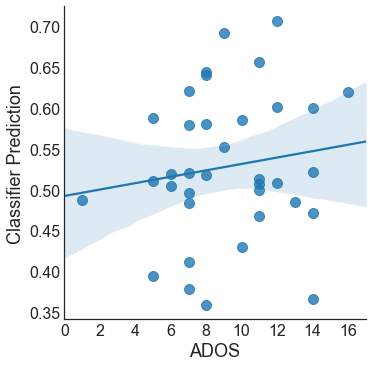

not normally distributed: p1=0.10782752931118011 p2=2.7381224457917464e-12
SpearmanrResult(correlation=0.483165927340415, pvalue=6.478892675270686e-06)


In [99]:
def simple_plot(df, x, y):
    sns.set_style("white")
    #experts_AQ=experts[experts.asq>0]
    g=sns.lmplot(x=x, y=y, data=df, #fit_reg=False,
               legend=False,  scatter_kws={"s": 100})
    plt.yticks(fontsize=16)    
    plt.xticks(fontsize=16)  
    plt.xlabel('ADOS', fontsize=18) 
    plt.ylabel('Classifier Prediction', fontsize=18)
    #plt.legend(title='ASC', loc = "upper left", fontsize=16)
    #plt.xlim(0,10)
    #plt.ylim(0,1)
    plt.savefig('Ados' + '_.pdf', format='pdf', bbox_inches = "tight")
    plt.savefig('Ados' + '_.png', format='png', bbox_inches = "tight")
    plt.show()

simple_plot(ml_classifier_and_experts.reset_index(drop=True)[ml_classifier_and_experts.ados_total>0],
            "ados_total", "pr_rf_full")

correlation(ml_classifier_and_experts['pr_rf_full'],  ml_classifier_and_experts.ados_total)

C:\Users\Hanna.Drimalla\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


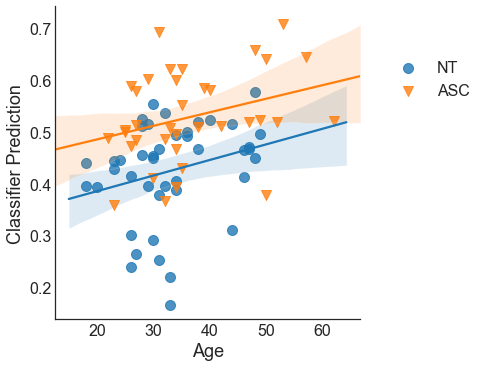

not normally distributed: p1=0.10782752931118011 p2=0.003274305025115609
SpearmanrResult(correlation=0.3515731637400539, pvalue=0.0014874381760502436)


In [98]:
def simple_plot(df, x, y):
    sns.set_style("white")
    #experts_AQ=experts[experts.asq>0]
    g=sns.lmplot(x=x, y=y, data=df, #fit_reg=False,
               hue='asc', legend=False,  scatter_kws={"s": 100},
               markers=["o", "v"] ).add_legend(bbox_to_anchor = (1.1, 0.8),  title='', fontsize=16)
    new_labels = ['NT', 'ASC']
    for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
        
    plt.yticks(fontsize=16)    
    plt.xticks(fontsize=16)  
    plt.xlabel('Age', fontsize=18) 
    plt.ylabel('Classifier Prediction', fontsize=18)
    #plt.legend(title='ASC', loc = "upper left", fontsize=16)
    #plt.xlim(0,10)
    #plt.ylim(0,1)

    plt.savefig('AGE' + '_.pdf', format='pdf', bbox_inches = "tight")
    plt.savefig('AGE' + '_.png', format='png', bbox_inches = "tight")
    plt.show()

simple_plot(ml_classifier_and_experts.reset_index(drop=True), "age", "pr_rf_full")

correlation(ml_classifier_and_experts['pr_rf_full'],  ml_classifier_and_experts.age)

sex = 2 --> 'male'

### compare classifier

In [30]:

# define contingency table

classifier1=ml_classifier_and_experts.correct_full
classifier2=ml_classifier_and_experts.correct_experts

def compare_classifiers(classifier1, classifier2):
    a=np.sum((classifier1==True) & (classifier2==True))
    b=np.sum((classifier1==True) & (classifier2==False))
    c=np.sum((classifier1==False) & (classifier2==True))
    d=np.sum((classifier1==False) & (classifier2==False))

    table = [[a, b], [c, d]]
    # calculate mcnemar test
    result = mcnemar(table, exact=True)
    # summarize the finding
    print('statistic=%.3f, p-value=%.3f' % (result.statistic, result.pvalue))
    # interpret the p-value
    alpha = 0.05
    if result.pvalue > alpha:
        print('Same proportions of errors (fail to reject H0)')
    else:
        print('Different proportions of errors (reject H0)')

In [34]:
compare_classifiers(classifier1, classifier2)
compare_classifiers(ml_classifier_and_experts.correct_full, ml_classifier_and_experts.correct_majority)
compare_classifiers(ml_classifier_and_experts.correct_gaze, ml_classifier_and_experts.correct_majority)
compare_classifiers(ml_classifier_and_experts.correct_voice, ml_classifier_and_experts.correct_majority)
compare_classifiers(ml_classifier_and_experts.correct_face_full, ml_classifier_and_experts.correct_majority)

statistic=14.000, p-value=1.000
Same proportions of errors (fail to reject H0)
statistic=9.000, p-value=0.014
Different proportions of errors (reject H0)
statistic=17.000, p-value=0.868
Same proportions of errors (fail to reject H0)
statistic=10.000, p-value=0.011
Different proportions of errors (reject H0)
statistic=12.000, p-value=0.121
Same proportions of errors (fail to reject H0)


In [38]:
compare_classifiers(ml_classifier_and_experts.correct_face_full, ml_classifier_and_experts.correct_gaze)


AttributeError: 'DataFrame' object has no attribute 'correct_face_full'


## Graphics

In [19]:
plt.style.use('seaborn-white')

plt.scatter(ml_classifier_and_experts.Value[ml_classifier_and_experts.asc==True], 
            ml_classifier_and_experts.pr_rf_face[ml_classifier_and_experts.asc==True], color='red')

plt.scatter(ml_classifier_and_experts.Value[ml_classifier_and_experts.asc==False], 
            ml_classifier_and_experts.pr_rf_face[ml_classifier_and_experts.asc==False], color='blue')

plt.xlabel('Expert Rating')
plt.ylabel('Face Classifier')
plt.xlim(0,10)
plt.ylim(0,1)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Value'

<Figure size 2160x576 with 0 Axes>

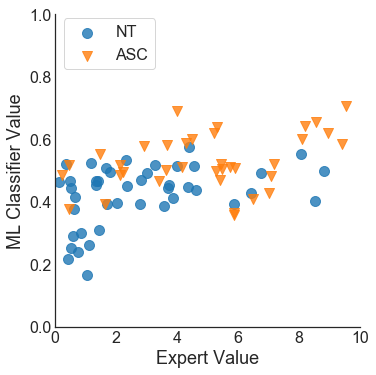

In [97]:
def simple_plot(df, x, y):
    
    plt.figure(figsize=(30, 8))  
    
    #fz=22 #16
    #lw=3 #1.5
    sns.set_style("white") 
    
    
    #experts_AQ=experts[experts.asq>0]
    g=sns.lmplot(x=x, y=y, data=df, fit_reg=False,
               hue='asc', legend=False,  scatter_kws={"s": 100},
               markers=["o", "v"] ).add_legend(bbox_to_anchor = (0.37, 0.92),  
                                               frameon=True, title='', fontsize=16)
    new_labels = ['NT', 'ASC']
    for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
     
    #plt.tight_layout()
    plt.yticks(fontsize=16)    
    plt.xticks(fontsize=16)  
    plt.xlabel('Expert Value', fontsize=18) 
    plt.ylabel('ML Classifier Value', fontsize=18)
    #plt.legend(title='ASC', loc = "upper left", fontsize=16)
    plt.xlim(0,10)
    plt.ylim(0,1)
    
    plt.savefig('Classifier_comparison' + '.pdf', format='pdf', bbox_inches = "tight")
    plt.savefig('Classifier_comparison' + '.png', format='png', bbox_inches = "tight")
   
    plt.show()
    plt.close()


simple_plot(ml_classifier_and_experts.reset_index(drop=True), "pr_rf_experts", "pr_rf_full")

In [93]:
def gender_plot(df, x, y):
    plt.figure(figsize=(20, 8))  
    
    kws = dict(s=50, linewidth=.5, edgecolor="w")
    g = sns.FacetGrid(df, col="sex", hue="asc", palette="Set1",
                      hue_order=[0, 1],  hue_kws=dict(marker=["o", "v"]))
    g = (g.map(plt.scatter, x , y,  **kws).add_legend(bbox_to_anchor = (1.1, 0.8)))
    g.set(xlabel='Expert Value', ylabel='Face Classifier Value')#, size=18)
    #plt.legend(title='Smoker', loc='upper left', labels=['Hell Yeh', 'Nah Bruh'])
    new_labels = ['NT', 'ASC']
    for t, l in zip(g._legend.texts, new_labels): t.set_text(l)


    axes = g.axes.flatten()
    axes[0].set_title("Female Participants")
    axes[1].set_title("Male Participants")

    plt.xlim(0,10)
    plt.ylim(0,1)
    plt.savefig('gender' +'.pdf', format='pdf', bbox_inches = "tight")
    plt.savefig('gender' +'.png', format='png', bbox_inches = "tight")
    plt.tight_layout()
    plt.show()   
    plt.close()




<Figure size 1440x576 with 0 Axes>

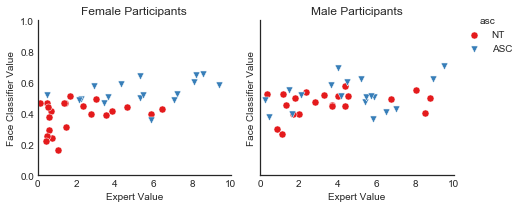

In [94]:
#gender_plot(ml_classifier_and_experts, 'pr_rf_experts', 'pr_rf_face')
#gender_plot(ml_classifier_and_experts, 'pr_rf_experts', 'pr_rf_gaze')
#gender_plot(ml_classifier_and_experts, 'pr_rf_experts', 'pr_rf_voice')
#gender_plot(ml_classifier_and_experts, 'pr_rf_experts', 'pr_rf_face_full')
gender_plot(ml_classifier_and_experts, 'pr_rf_experts', 'pr_rf_full')

In [ ]:
predictions = {'voice': ml_classifier_and_experts.pr_rf_voice, 
               'face': ml_classifier_and_experts.pr_rf_face_full, 
               'gaze': ml_classifier_and_experts.pr_rf_gaze, 
               'total': ml_classifier_and_experts.pr_rf_full, 
               'experts': ml_classifier_and_experts.pr_rf_experts} 
from sklearn.metrics import roc_curve, auc

def all_roc_graph(y_true, predictions, name): 
   
    plt.figure(figsize=(12, 8))  
    pred=0
    fz=22 #16
    lw=3 #1.5
    sns.set_style("white") 
    
    colors=[ (0, 128, 128),  (0, 0, 128), (200, 128, 0), (128, 0, 0), (31, 119, 180), (255, 127, 14)]
    linestyle = ['-', '-.', '--', ':', '-.', '-', '--', ':']
    markers = [' ', ' ', ' ', ' ', 'o', 'x']
    
    plt.plot([-0.01, 1.01], [-0.01, 1.01], color=(0 / 255., 0 / 255., 0 / 255.), 
             linestyle='-',lw=0.5)
    
    for i in range(len(colors)): 
        r, g, b = colors[i]
        colors[i] = (r / 255., g / 255., b / 255.) 
        
    for key in predictions:
        
        fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_true, predictions[key], drop_intermediate=False)
        roc_auc_nn = auc(fpr_nn, tpr_nn)

        plt.plot(fpr_nn, tpr_nn, label=key + ': AUC = %0.2f' % (roc_auc_nn),
                 lw=lw,
                 linestyle=linestyle[pred],
                 color=colors[pred],
                 marker=markers[pred]
                )    
        pred=pred+1      
        
   
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.yticks(fontsize=fz)    
    plt.xticks(fontsize=fz)  
    plt.xlabel('False Positive Rate', fontsize=fz)
    plt.ylabel('True Positive Rate', fontsize=fz)
    plt.title('Receiver Operating Characteristic', fontsize=fz)
    plt.legend(loc='lower right', fontsize=fz-2)   
    plt.savefig('ROC_' + name +'.png', format='png')
    plt.savefig('ROC_' + name +'.pdf', format='pdf')
    plt.show()   
    plt.close()
    
all_roc_graph(ml_classifier_and_experts.asc, predictions, 'ROC')


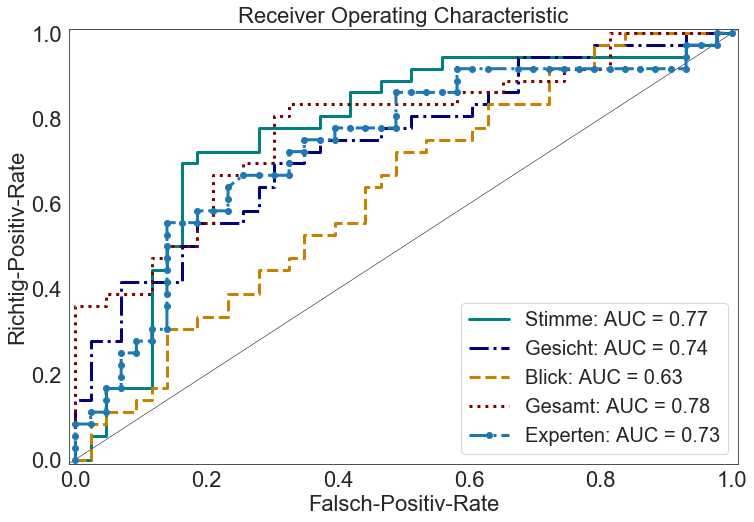

In [8]:
predictions = {'Stimme': ml_classifier_and_experts.pr_rf_voice, 
               'Gesicht': ml_classifier_and_experts.pr_rf_face_full, 
               'Blick': ml_classifier_and_experts.pr_rf_gaze, 
               'Gesamt': ml_classifier_and_experts.pr_rf_full, 
               'Experten': ml_classifier_and_experts.pr_rf_experts} 
from sklearn.metrics import roc_curve, auc

def all_roc_graph(y_true, predictions, name): 
   
    plt.figure(figsize=(12, 8))  
    pred=0
    fz=22 #16
    lw=3 #1.5
    sns.set_style("white") 
    
    colors=[ (0, 128, 128),  (0, 0, 128), (200, 128, 0), (128, 0, 0), (31, 119, 180), (255, 127, 14)]
    linestyle = ['-', '-.', '--', ':', '-.', '-', '--', ':']
    markers = [' ', ' ', ' ', ' ', 'o', 'x']
    
    plt.plot([-0.01, 1.01], [-0.01, 1.01], color=(0 / 255., 0 / 255., 0 / 255.), 
             linestyle='-',lw=0.5)
    
    for i in range(len(colors)): 
        r, g, b = colors[i]
        colors[i] = (r / 255., g / 255., b / 255.) 
        
    for key in predictions:
        
        fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_true, predictions[key], drop_intermediate=False)
        roc_auc_nn = auc(fpr_nn, tpr_nn)

        plt.plot(fpr_nn, tpr_nn, label=key + ': AUC = %0.2f' % (roc_auc_nn),
                 lw=lw,
                 linestyle=linestyle[pred],
                 color=colors[pred],
                 marker=markers[pred]
                )    
        pred=pred+1      
        
   
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.yticks(fontsize=fz)    
    plt.xticks(fontsize=fz)  
    plt.xlabel('Falsch-Positiv-Rate', fontsize=fz)
    plt.ylabel('Richtig-Positiv-Rate', fontsize=fz)
    plt.title('Receiver Operating Characteristic', fontsize=fz)
    plt.legend(loc='lower right', fontsize=fz-2)   
    plt.savefig('ROC_' + name +'.png', format='png')
    plt.savefig('ROC_' + name +'.pdf', format='pdf')
    plt.show()   
    plt.close()
    
all_roc_graph(ml_classifier_and_experts.asc, predictions, 'ROC')


In [ ]:
def three_d_plt(df, x, y, z):
    #sns.set_style("whitegrid", {'axes.grid' : False})

    #plt.style.use('seaborn-whitegrid') 
    fig = plt.figure(figsize=(8,6))

    ax = plt.axes(projection='3d')
    #ax.grid(False)
    ax.xaxis.pane.set_edgecolor('black')
    ax.yaxis.pane.set_edgecolor('black')
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    ax.scatter(df['Value'],
               df['pr_rf_face'], 
               df['pr_rf_gaze'], 
               alpha=0.8, s=30,
               c=gaze_face_experts['asc'], 
               cmap='viridis', linewidth=0.5,
               )
    ax.set_xlabel('Expert Raters')
    ax.set_ylabel('Face Classifier')
    ax.set_zlabel('Voice Classifier')
    ax.set_xlim(0,10)
    ax.set_ylim(0,1)
    ax.set_zlim(0,1)
    ax.legend(labels=('NT', 'ASC'))
    plt.show()
    

In [ ]:
three_d_plt(ml_classifier_and_experts, 'Value', 'pr_rf_face_full', 'pr_rf_voice')

x-Achse: face
y-Achse: voice
z-Achse: rater
color: tatsächliche Diagnose
sign: gender

In [ ]:
import scipy 
a=(ml_classifier_and_experts.pr_rf_voice>0.5)*1==gaze_face_experts.asc
b=(ml_classifier_and_experts.Value>0.5)*1==gaze_face_experts.asc

scipy.stats.wilcoxon(gaze_face_experts.pr_rf_voice, gaze_face_experts.Value)


In [ ]:
# AQ
path='./results/AQ_LogRec_Results.csv'
AQ=pd.read_csv(path, header=None, sep=';', na_values=['?'])
AQ_pred=AQ.iloc[0,:].astype('str').str.split('  ', expand=True).iloc[:,1].str[0:-1].astype(float)
y_true_AQ=AQ.iloc[1,:].astype(float)
print (AQ_pred)

In [ ]:
print len(y_true_AQ[y_true_AQ==1])
print np.sum(y_true_AQ[y_true_AQ==1]==(AQ_pred[y_true_AQ==1]>0.6))
print len(y_true_AQ[y_true_AQ==0])
print np.sum(y_true_AQ[y_true_AQ==0]==(AQ_pred[y_true_AQ==0]>0.6))

In [ ]:
#Total
path='./results/SIandAQRF_SVM_Results.csv'
pr_rf_combinded, pr_svm_combinded, _, y_true_combinded=load_results(path)

In [38]:
#Total
path='./results/totalRF_SVM_Results.csv'
pr_rf_total, pr_svm_total, _, y_true_total=load_results(path)

#Face
path='./results/smallRF_SVM_Results.csv'
pr_rf_face, pr_svm_face, _, y_true_face=load_results(path)

#Audio
path='./results/audio_RF_SVM_Results.csv'
pr_rf_audio, pr_svm_audio, _, y_true_audio=load_results(path)

#Occurcence AU
path='./results/occRF_SVM_Results.csv'
pr_rf_occ, pr_svm_occ,_, y_true_occ=load_results(path)

#Intensity AU
path='./results/intRF_SVM_Results.csv'
pr_rf_int, pr_svm_int,_, y_true_int=load_results(path)

#Gaze AU
path='./results/gazeRF_SVM_Results.csv'
pr_rf_gaze, pr_svm_gaze,_, y_true_gaze=load_results(path)

#CNNs

path='./results/totalcnn_stacked_results.csv'
_, _, pr_stackedCNN, y_true_CNN_stacked = load_results(path, 'nn')

path='./results/totalsimple_cnnresults.csv'
_, _, pr_simpleCNN, y_true_CNN_simple = load_results(path, 'nn')

path='./results/totalresults_hyper_sep.csv'
_, _, pr_pooledCNN, y_true_CNN_pooled = load_results(path, 'nn')


In [39]:
def check_precision(pred, y_true):
    precision = np.sum(((pred>0.5)*1)==y_true)/(len(y_true))
    print precision

check_precision(pr_svm_audio, y_true_audio)

0.7435897435897436


# Graphics

In [62]:
fz=22 #16
lw=3 #1.5

In [65]:
def all_roc_graph(y_true, predictions, name='ROC_RF_SVM', aq='off', y_true_AQ=[], AQ_pred=[]): #, probs_hyper, probs_hyper_pool):
    
    plt.figure(figsize=(12, 8))  
    pred=0
    
    sns.set_style("white")
 
    #colors = [(31, 119, 180), (255, 127, 14),  (44, 160, 44),  (148, 103, 189), (140, 86, 75), 
    #             (227, 119, 194), (127, 127, 127),  (188, 189, 34), (23, 190, 207)] 
    #colors=[(31, 119, 180), (255, 127, 14),  (44, 160, 44),  (148, 103, 189)]
    
    colors=[ (0, 128, 128),  (0, 0, 128), (200, 128, 0), (128, 0, 0), (31, 119, 180), (255, 127, 14)]
    linestyle = ['-', '-.', '--', ':', '-.', '-', '--', ':']
    markers = [' ', ' ', ' ', ' ', 'o', 'x']
    
    plt.plot([-0.01, 1.01], [-0.01, 1.01], color=(0 / 255., 0 / 255., 0 / 255.), 
             linestyle='-',lw=0.5)
    
    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for i in range(len(colors)): 
        r, g, b = colors[i]
        colors[i] = (r / 255., g / 255., b / 255.)    

    for key in predictions:
        fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_true[key], predictions[key], drop_intermediate=False)
        roc_auc_nn = auc(fpr_nn, tpr_nn)
        plt.plot(fpr_nn, tpr_nn, label=key + ': AUC = %0.2f' % (roc_auc_nn), 
                 lw=lw,
                 linestyle=linestyle[pred],
                 color=colors[pred],
                 marker=markers[pred]
                )    
        pred=pred+1
        
        
        
    if aq=='on':
        fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_true_AQ, AQ_pred, drop_intermediate=False)
        roc_auc_nn = auc(fpr_nn, tpr_nn)
        print pred
        plt.plot(fpr_nn, tpr_nn, label='AQ Questionnaire: AUC = %0.2f' % (roc_auc_nn),
                 lw=lw, linestyle=linestyle[pred], color=colors[pred])
        pred=pred+1

            
   
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.yticks(fontsize=fz)    
    plt.xticks(fontsize=fz)  
    plt.xlabel('False Positive Rate', fontsize=fz)
    plt.ylabel('True Positive Rate', fontsize=fz)
    plt.title('Receiver Operating Characteristic', fontsize=fz)
    plt.legend(loc='lower right', fontsize=fz-2)   
    plt.savefig('ROC_' + name +'.pdf', format='pdf')
    plt.show()   
    plt.close()


## Fig.1: Comparison of all Learned Models (for the total DF)

In [66]:
predictions = {"Random Forest": pr_rf_total,
               "Support Vector Machine": pr_svm_total, 
               #"LSTM": probs_lstm,
              # "Simple CNN" : pr_simpleCNN, 
               "Stacked CNN": pr_stackedCNN, 
               "Pooled CNN": pr_pooledCNN}

y_true = {"Random Forest": y_true_total,
          "Support Vector Machine": y_true_total, 
          #"Simple CNN" : y_true_CNN_simple, 
          "Stacked CNN": y_true_CNN_stacked,
          "Pooled CNN": y_true_CNN_pooled} #beim pooled kommen irgendwie andere Werte als beim Original raus...

all_roc_graph(y_true, predictions, 'AllClassifiers')

## Fig. 2: Comparison of Different Features (for the best Classifier RF)

In [67]:
plt.close()

predictions = {"Combined": pr_rf_total,
               "Video": pr_rf_face,
               "Audio": pr_rf_audio, 
               "AU Occurence": pr_rf_occ,
               "AU Intensity": pr_rf_int,
               "Gaze": pr_rf_gaze}

y_total= {"Combined": y_true_total, 
          "Video": y_true_face, 
          "Audio": y_true_audio, 
          "AU Occurence": y_true_occ,
          "AU Intensity": y_true_int,
          "Gaze": y_true_gaze}

all_roc_graph(y_total, predictions, 'Feature_Comparison_RF')

In [79]:
plt.close()

predictions = {"Combined": pr_rf_total,
               "Video": pr_rf_face,
               "Audio": pr_rf_audio, 
               #"AU Occurence": pr_rf_occ,
               #"AU Intensity": pr_rf_int,
               "Gaze": pr_rf_gaze}

y_total= {"Combined": y_true_total, 
          "Video": y_true_face, 
          "Audio": y_true_audio, 
         # "AU Occurence": y_true_occ,
         # "AU Intensity": y_true_int,
          "Gaze": y_true_gaze}

all_roc_graph(y_total, predictions, 'Feature_Comparison_RF')

## Fig. 4: Regression - Scatter Plot

In [77]:
def regression_plot(predicition, true, name):
    plt.close()
    plt.figure(figsize=(12,8))
    ax=sns.regplot(predicition, true, ci=None, scatter_kws={'s':100})#, label='small')
      
    plt.yticks(fontsize=fz)    
    plt.xticks(fontsize=fz)  
    plt.xlabel('True Values', fontsize=fz)
    plt.ylabel('Predicted Values ', fontsize=fz)
    plt.title(name, fontsize=fz)
    
    ax.set(xlabel='Predicted Value', ylabel='True Value')
    
    plt.savefig('Regression.pdf', format='pdf')
    plt.savefig('Regression.eps', format='eps')
    plt.show()  
    #plt.close()
    
    print stats.pearsonr(predicition, true) #nv getestet

In [78]:
#load and plot regressio data (predicition vs. true value)

path='./results/workingregressionADIsocial.csv'

adir_rf, adir_svm, _, adir_true=load_results(path, 'regression')

regression_plot(adir_rf, adir_true, 'ADI-R Social Subscale')

(0.393025514977708, 0.07037895291238871)


# Statistical Testing

In [24]:
def evaluate(y_true, predictions):
    i=0
    stat_key=[]
    stat_M=[]
    stat_Mp=[]
    stat_R=[]
    stat_Rp=[]

    for key in predictions:        
        pred=predictions[key]>0.5
        correcte_pred=np.array((y_true[key]==pred)*1) # Prüft, ob korrekte Vorhersage durch Classifier
        correcte_mayority_pred=np.array((np.ones(len(y_true[key]))==y_true[key])*1) #Baseline: Mehrheitsklasse zum vergleichen
        
        print key
        print sign_test((correcte_pred-correcte_mayority_pred), mu0=0) #returns M = (N(+) - N(-))/2 and p
        print stats.pointbiserialr(y_true[key], pred)
        for second in predictions:
                second_pred=predictions[second]>0.5
                correcte_second_pred=np.array((y_true[second]==second_pred)*1)
                try:
                    print str(second) + " vs. " + str(key)
                    print sign_test((correcte_pred-correcte_second_pred), mu0=0)
                except:
                    print 'comparison not possible'


In [25]:

predictions = {"Total": pr_rf_total,
               "Video": pr_rf_face,
               "Audio": pr_rf_audio, 
               "AU Occurence": pr_rf_occ,
               "AU Intensity": pr_rf_int,
               "Gaze": pr_rf_gaze}

y_total= {"Total": y_true_total, 
          "Video": y_true_face, 
          "Audio": y_true_audio, 
          "AU Occurence": y_true_occ,
          "AU Intensity": y_true_int,
          "Gaze": y_true_gaze}

evaluate(y_total, predictions)


AU Intensity
(9.5, 0.012660335802414201)
PointbiserialrResult(correlation=0.3757237916122186, pvalue=0.0005472005761318717)
AU Intensity vs. AU Intensity
(0.0, 1.0)
Audio vs. AU Intensity
comparison not possible
Gaze vs. AU Intensity
(7.0, 0.028816719655878835)
Video vs. AU Intensity
(-0.5, 0.9999999999999994)
AU Occurence vs. AU Intensity
(4.5, 0.06356811523437494)
Total vs. AU Intensity
comparison not possible
Audio
(11.0, 0.0016414913408482337)
PointbiserialrResult(correlation=0.4826170890658404, pvalue=7.650873953676914e-06)
AU Intensity vs. Audio
comparison not possible
Audio vs. Audio
(0.0, 1.0)
Gaze vs. Audio
comparison not possible
Video vs. Audio
comparison not possible
AU Occurence vs. Audio
comparison not possible
Total vs. Audio
comparison not possible
Gaze
(2.5, 0.5900533317766368)
PointbiserialrResult(correlation=0.006553975008278078, pvalue=0.9536932053939093)
AU Intensity vs. Gaze
(-7.0, 0.028816719655878835)
Audio vs. Gaze
comparison not possible
Gaze vs. Gaze
(0.0, 1.

In [26]:
predictions = {"Random Forest": pr_rf_total,
               "Support Vector Machine": pr_svm_total, 
               #"LSTM": probs_lstm,
               "Simple CNN" : pr_simpleCNN, 
               "Stacked CNN": pr_stackedCNN, 
               "Pooled CNN": pr_pooledCNN,
              "AQ": AQ_pred}

y_total = {"Random Forest": y_true_total,
          "Support Vector Machine": y_true_total, 
          "Simple CNN" : y_true_CNN_simple, 
          "Stacked CNN": y_true_CNN_stacked,
          "Pooled CNN": y_true_CNN_pooled,
          "AQ": y_true_AQ}

evaluate(y_total, predictions)

Support Vector Machine
(9.5, 0.006608822842281368)
PointbiserialrResult(correlation=0.42458654189312234, pvalue=0.00011881208261328908)
Support Vector Machine vs. Support Vector Machine
(0.0, 1.0)
Pooled CNN vs. Support Vector Machine
comparison not possible
Simple CNN vs. Support Vector Machine
comparison not possible
AQ vs. Support Vector Machine
(-9.5, 6.604194641113283e-05)
Stacked CNN vs. Support Vector Machine
comparison not possible
Random Forest vs. Support Vector Machine
(-2.0, 0.3876953125000001)
Pooled CNN
(5.0, 0.17417114727072655)
PointbiserialrResult(correlation=0.2050691248325695, pvalue=0.07555827683053104)
Support Vector Machine vs. Pooled CNN
comparison not possible
Pooled CNN vs. Pooled CNN
(0.0, 1.0)
Simple CNN vs. Pooled CNN
(3.5, 0.3488888794490776)
AQ vs. Pooled CNN
comparison not possible
Stacked CNN vs. Pooled CNN
(5.0, 0.16414940178310666)
Random Forest vs. Pooled CNN
comparison not possible
Simple CNN
(1.5, 0.7659918242447937)
PointbiserialrResult(correlation

In [ ]:
'svc__C': [1, 5, 10, 50],
'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]
            
a=[1.00000000e-03,   1.00000000e-02,   1.00000000e-01,  1.00000000e+00,   1.00000000e+01,   1.00000000e+02]

In [ ]:
def reg_cor(x, y, x_label, y_label):
    plt.figure(figsize=(12,8))
    sns.regplot(x, y)
    plt.yticks(fontsize=14)    
    plt.xticks(fontsize=14)  
    plt.xlabel(x_label, fontsize=16) 
    plt.ylabel(y_label, fontsize=16) 
    plt.savefig(x_label + y_label + '_Regression_Correlation.png')
    plt.show()
    plt.close()
    
plt.scatter(df[df.asc==1].groupby('vpn').adir_social.mean(), df[df.asc==1].groupby('vpn').asq.mean())
plt.show()


sns.regplot(df[df.ados_total>0].groupby('vpn').mean().asq, df[df.ados_total>0].groupby('vpn').mean().ados_social)
plt.show()

plt.scatter(df[df.ados_total>0].groupby('vpn').mean().asq, df[df.ados_total>0].groupby('vpn').mean().ados_commu)
plt.show()